In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.interpolate import griddata

# from /usr/local/lib/python3.9/site-packages/classy-2.7.2-py3.9.egg-info/classy import Class

In [2]:
#common parameters

params = {'output' : 'dTk, vTk'}

cs2_target = 0.01
w0_target = -0.8

label_model = 'w0 = %g, cs2 = %g'%(w0_target,cs2_target)


In [3]:
#run the fluid in hi_class

c = Class()

params_kess_class = params.copy()
params_kess_class['Omega_Lambda'] = 0
params_kess_class['Omega_scf'] = 0
params_kess_class['cs2_fld'] = cs2_target
params_kess_class['w0_fld'] = w0_target

c.set(params_kess_class)
c.compute()

back_c = c.get_background()
tran_c = c.get_transfer()

CosmoComputationError: 

Error in Class: thermodynamics_init(L:301) :error in thermodynamics_helium_from_bbn(ppr,pba,pth);
=>thermodynamics_helium_from_bbn(L:1112) :could not open fA with name /Users/farbod/Dropbox/Projects/k-evolution/gevolution-dev-master_fluid-FH/gevolution_FH_v2_class_pre/class_public/bbn/sBBN.dat and mode "r"

In [7]:
print tran_c.keys()
plt.semilogx(tran_c['k (h/Mpc)'],tran_c['psi'])

NameError: name 'tran_c' is not defined

In [8]:
#run the fluid in class

hc = Class()

params_kess_hiclass = params.copy()
params_kess_hiclass['Omega_Lambda'] = 0
params_kess_hiclass['Omega_fld'] = 0
params_kess_hiclass['Omega_smg'] = -1
params_kess_hiclass['expansion_model'] = 'wowa'
params_kess_hiclass['expansion_smg'] = '0.7,%g,0'%w0_target
params_kess_hiclass['gravity_model'] = 'propto_omega'
params_kess_hiclass['parameters_smg'] = '%g, 0., 0., 0., 1.'%(3.*(1+w0_target)/(cs2_target))
params_kess_hiclass['output_background_smg'] = 10

hc.set(params_kess_hiclass)
hc.compute()

back_hc = hc.get_background()
tran_hc = hc.get_transfer()

CosmoSevereError: 

Error in Class: input_init(L:441) :error in input_read_parameters(pfc, ppr, pba, pth, ppt, ptr, ppm, psp, pnl, ple, pop, errmsg);
=>input_read_parameters(L:949) :condition ((flag1 == _TRUE_) && (flag2 == _TRUE_) && ((flag3 == _FALSE_) || (param3 >= 0.))) is true; In input file, either Omega_Lambda or Omega_fld must be left unspecified, except if Omega_scf is set and <0.0, in which case the contribution from the scalar field will be the free parameter.

['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', '(.)p_tot', 'comov.snd.hrz.', 'gr.fac. f', '(.)rho_g', '(.)rho_ur', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', '(.)rho_tot', 'gr.fac. D', '(.)p_tot_prime', '(.)w_fld', 'z', '(.)rho_fld'] 

['(.)rho_crit', 'lambda_2_p', 'tensor_excess_smg', '(.)p_smg', 'cs2num_p', 'cs2num', '(.)rho_smg', '(.)p_tot_prime', '(.)rho_cdm', 'kineticity_smg', 'kin (D)', '(.)rho_ur', '(.)rho_tot', 'M*^2_smg', 'c_s^2', 'ang.diam.dist.', 'proper time [Gyr]', 'Mpl_running_smg', 'slip_eff_smg', 'lambda_8_p', 'lambda_10', 'lambda_11', 'H [1/Mpc]', 'conf. time [Mpc]', 'lambda_11_p', 'lum. dist.', 'lambda_7', 'gr.fac. f', 'kineticity_prime_smg', 'D_M*^2_smg', 'lambda_4', '(.)p_tot', 'lambda_6', 'lambda_3', 'braiding_smg', 'lambda_1', 'lambda_2', 'comov.snd.hrz.', 'lambda_9_p', '(.)rho_b', 'lambda_8', 'lambda_9', '(.)rho_g', 'comov. dist.', 'lambda_5', 'G_eff_smg', 'gr.fac. D', 'braiding_prime_smg', 'z']


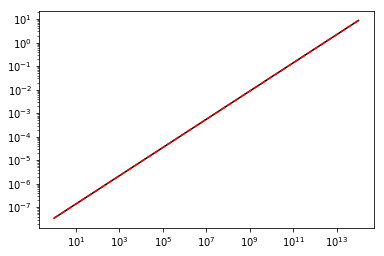

In [179]:
print back_c.keys(), '\n'
print back_hc.keys()
plt.loglog(1+back_c['z'],back_c['(.)rho_fld'],'k-')
plt.loglog(1+back_hc['z'],back_hc['(.)rho_smg'],'r--')

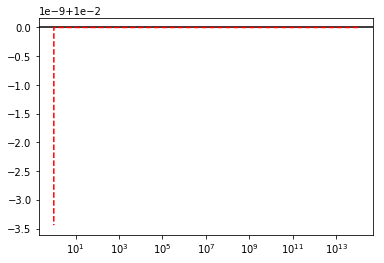

In [183]:
plt.axhline(cs2_target,ls='-',c='k')
plt.semilogx(1+back_hc['z'],back_hc['c_s^2'],'r--')

['phi', 'psi', 'vx_smg', 't_b', 'd_tot', 't_g', 't_ur', 'd_ur', 'd_cdm', 'd_b', 't_tot', 'vx_prime_smg', 'd_g', 'k (h/Mpc)']


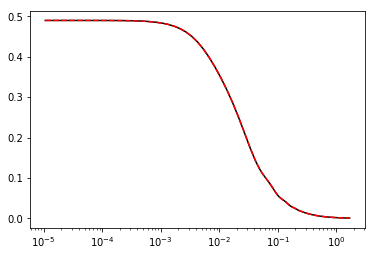

In [202]:
print tran_hc.keys()
plt.semilogx(tran_c['k (h/Mpc)'],tran_c['psi'],'k-',label='psi (fld)')
plt.semilogx(tran_hc['k (h/Mpc)'],tran_hc['psi'],'r--', label ='psi (smg)')

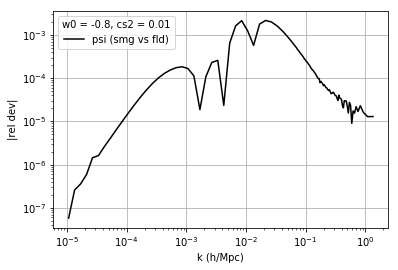

In [231]:
#interpolate the hi_class value to ensure same k's
var = 'psi'

tran_hc_interp = griddata(tran_hc['k (h/Mpc)'], tran_hc[var],tran_c['k (h/Mpc)'])

plt.loglog(tran_c['k (h/Mpc)'], abs(tran_c[var]/tran_hc_interp-1),'k-',label='psi (smg vs fld)')
#plt.loglog(tran_c['k (h/Mpc)'], 100*abs(tran_c['k (h/Mpc)'] /tran_hc['k (h/Mpc)']-1),'b:',label='k')
plt.legend(title = label_model)
plt.xlabel('k (h/Mpc)')
plt.ylabel('|rel dev|')
plt.grid()

['phi', 'psi', 'vx_smg', 't_b', 'd_tot', 't_g', 't_ur', 'd_ur', 'd_cdm', 'd_b', 't_tot', 'vx_prime_smg', 'd_g', 'k (h/Mpc)']
['phi', 'psi', 't_b', 'd_tot', 'd_fld', 't_g', 'd_ur', 'd_cdm', 'd_b', 't_tot', 't_ur', 't_fld', 'd_g', 'k (h/Mpc)']


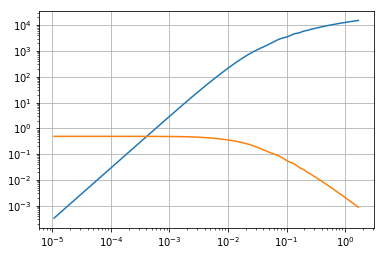

In [212]:
print tran_hc.keys()
print tran_c.keys()

plt.loglog(tran_c['k (h/Mpc)'],abs(tran_c['d_tot']))
plt.loglog(tran_c['k (h/Mpc)'],abs(tran_c['phi']))
plt.grid()

0.67556


Text(0.5,0,'k (h/Mpc)')

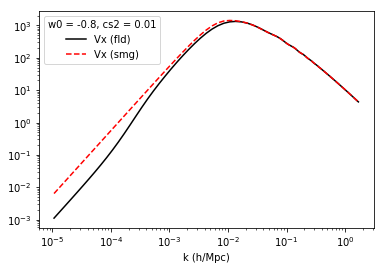

In [226]:
#plot vX

#interpolate to get same k vales vX_hc_interp = griddata(tran_hc['k (h/Mpc)'], tran_hc['vx_smg'],tran_c['k (h/Mpc)'])


h = c.h() #0.67556 is default value
print h

vX_c = -tran_c['t_fld']/(tran_c['k (h/Mpc)']**2*h**2)

plt.loglog(tran_c['k (h/Mpc)'], vX_c,'k-',label='Vx (fld)')
plt.loglog(tran_hc['k (h/Mpc)'], tran_hc['vx_smg'],'r--', label='Vx (smg)')

plt.legend(title=label_model)
plt.xlabel('k (h/Mpc)')


Text(0,0.5,'|rel dev|')

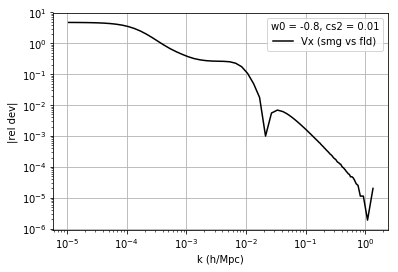

In [228]:
#plot vX

#interpolate to get same k vales 

vX_hc_interp = griddata(tran_hc['k (h/Mpc)'], tran_hc['vx_smg'],tran_c['k (h/Mpc)'])

vX_c = -tran_c['t_fld']/(tran_c['k (h/Mpc)']**2*h**2)

plt.loglog(tran_c['k (h/Mpc)'], abs(vX_hc_interp/vX_c-1.),'k-',label='Vx (smg vs fld)')

plt.grid()

plt.legend(title=label_model)
plt.xlabel('k (h/Mpc)')
plt.ylabel('|rel dev|')